## Perform Exploratory Data Analysis on 'Indian Premiere League'
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

### Author: Madhushree M
Copyright Madhushree M, 2021

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
#loading datasets
df  = pd.read_csv('matches.csv',index_col=0)
delivery = pd.read_csv('deliveries.csv')
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#shape of the data
df.shape

(756, 17)

* There are 756 examples and 18 attributes

In [4]:
# duplicates
df[df.duplicated()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,


* There are no duplicates in the data

In [5]:
# missing data
df_missing = pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})
df_missing.sort_values(by='Count',ascending=False)

<IPython.core.display.Javascript object>

,Count,Percentage
umpire3,637,84.259259
city,7,0.925926
winner,4,0.529101
player_of_match,4,0.529101
umpire2,2,0.264550
umpire1,2,0.264550
venue,0,0.000000
win_by_wickets,0,0.000000
win_by_runs,0,0.000000
season,0,0.000000


* There are missing values in the data.
* Being 84% of the data is missing from umpire3 feature, let's drop the feature.
* The rest missing values were dropped from the data going forward.

In [7]:
df = df.drop('umpire3',1)

In [8]:
print('The data before dropping null values: ',df.shape)
df = df.dropna(axis=0)
print('The data after dropping null values: ',df.shape)

The data before dropping null values:  (756, 16)
The data after dropping null values:  (743, 16)


* Dropped 84% missing feature and the rows with missing values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

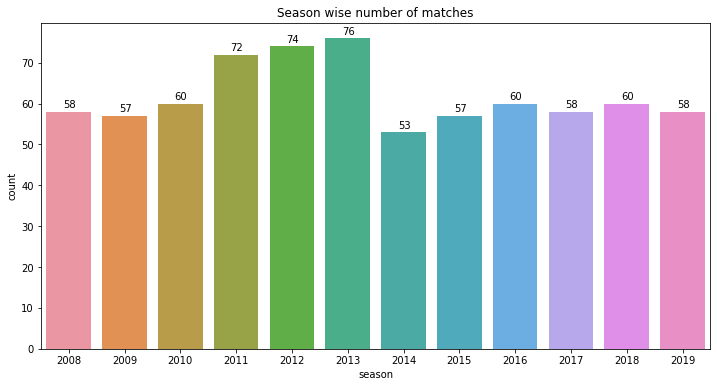

In [9]:
#Season wise number of matches
plt.figure(figsize=(12,6))
ax = sns.countplot(df['season'])
plt.title('Season wise number of matches')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

* As we can see most number of matches played in 2013 followed by 2012.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

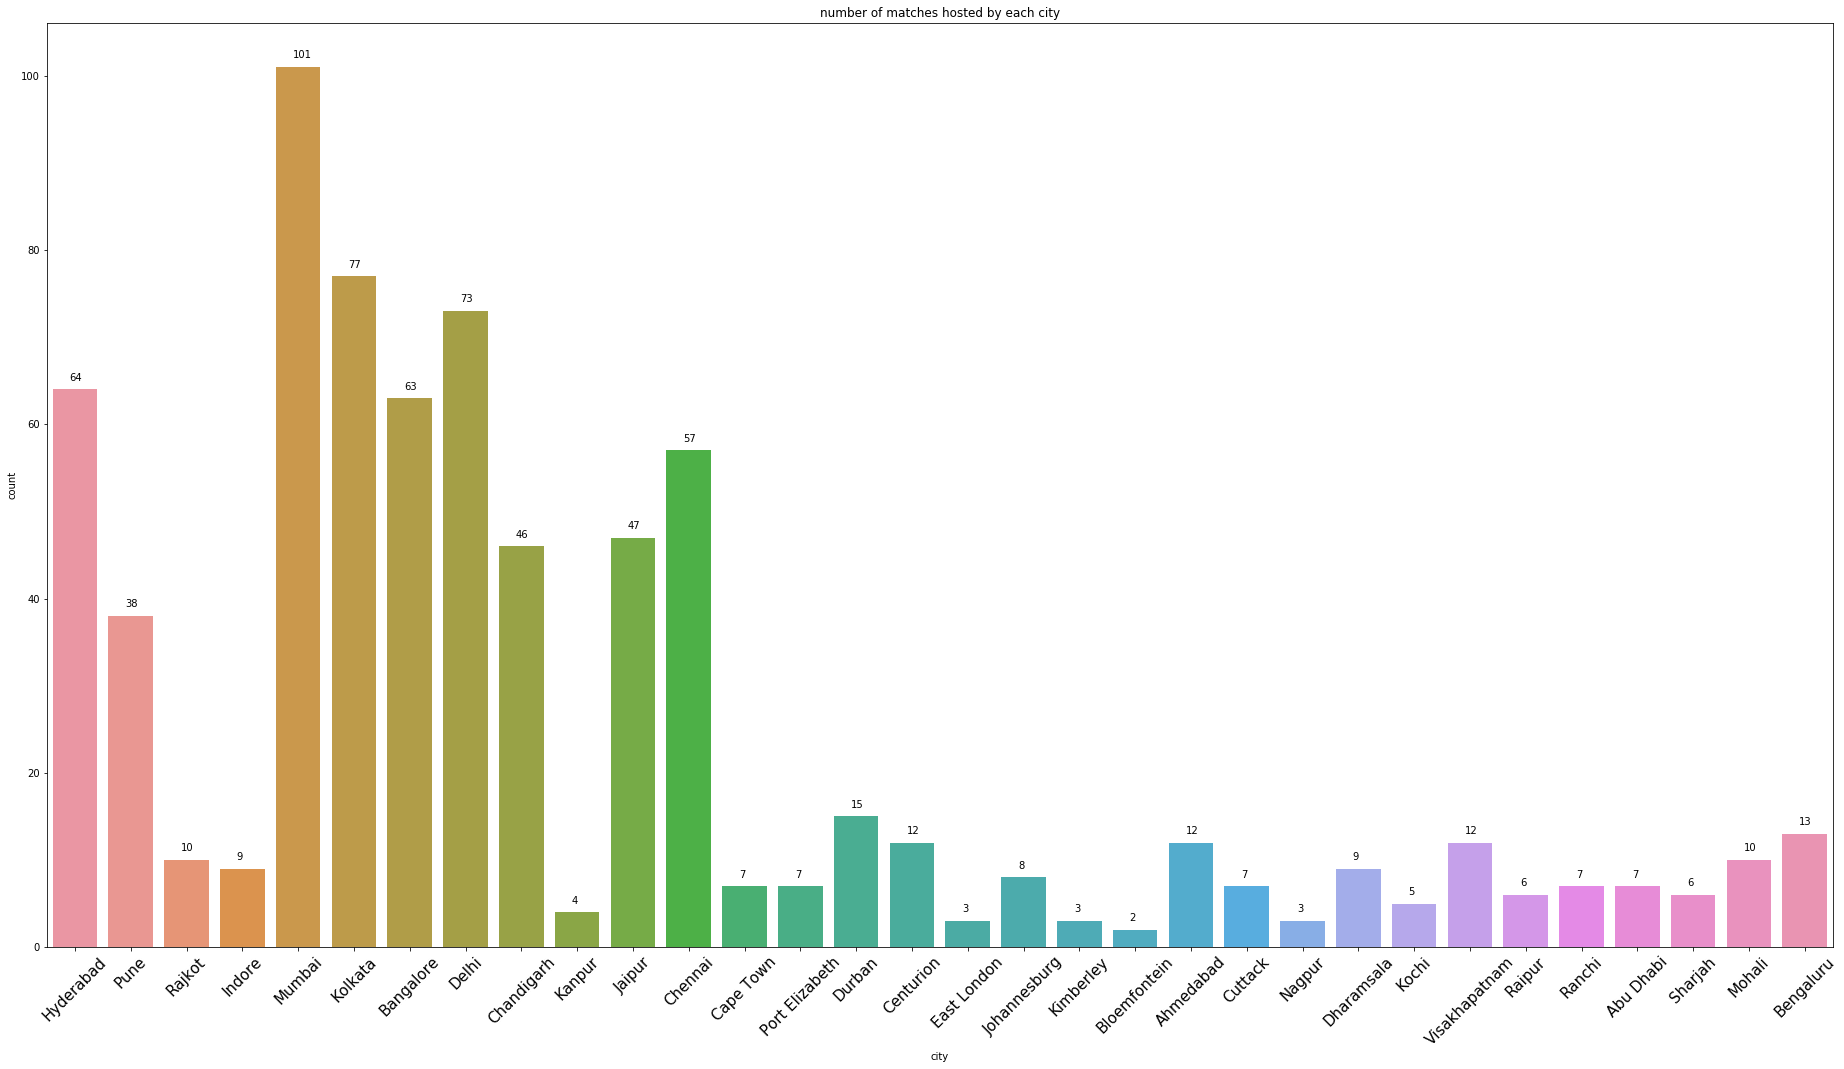

In [10]:
# city hosted more number of matches
plt.figure(figsize=(32,17))
ax = sns.countplot(df['city'])
plt.title('number of matches hosted by each city')
plt.xticks(rotation=45,fontsize=15)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

* City Mumbai hosted more number of matches followed by Kolkata

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

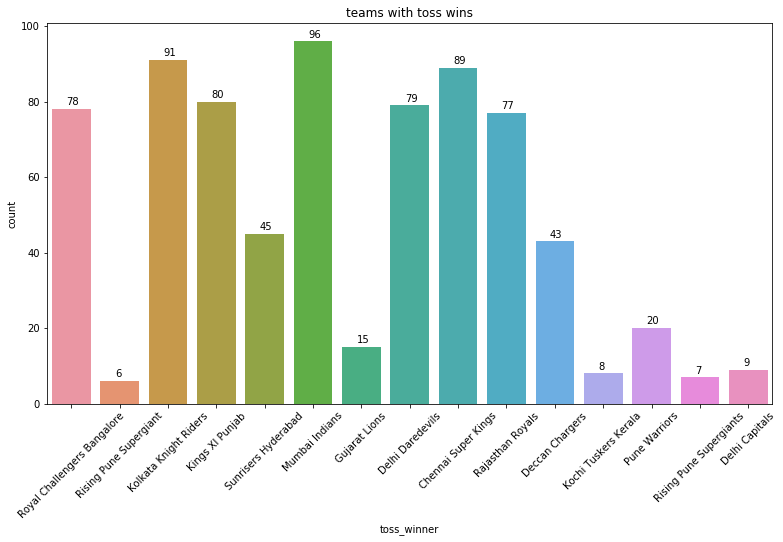

In [11]:
# teams with toss wins
plt.figure(figsize=(13,7))
ax = sns.countplot(df['toss_winner'])
plt.title('teams with toss wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

* Mumbai Indians is the team who won more number of tosses.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

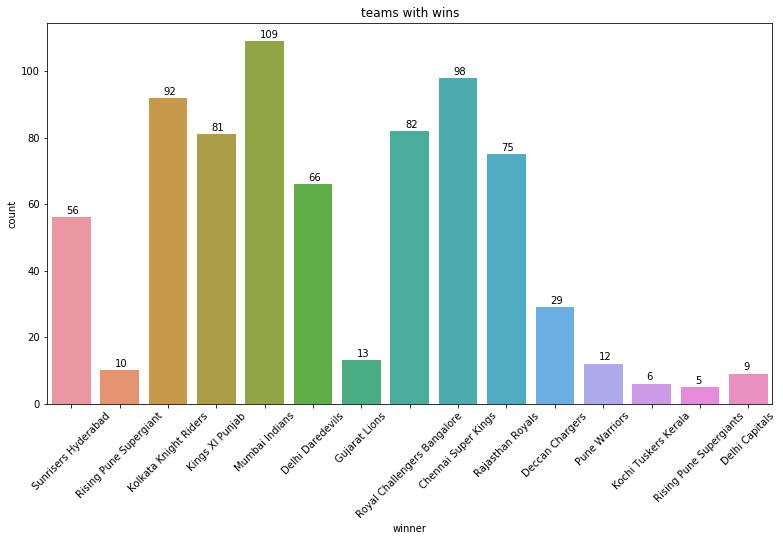

In [12]:
# teams with wins
plt.figure(figsize=(13,7))
ax = sns.countplot(df['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

* Mumbai Indian tops the list with more number of matches followed by Chennai Super Kings.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

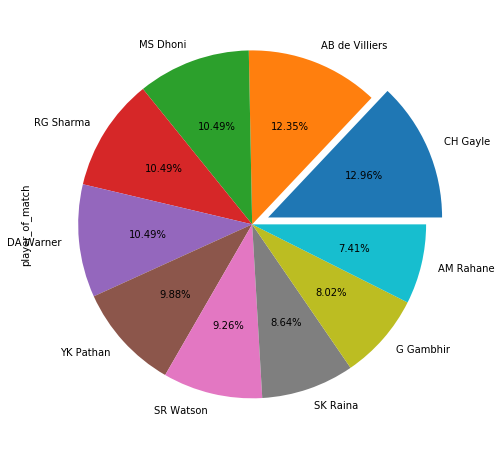

In [13]:
# teams with wins
plt.figure(figsize=(13,8))
explode = [0.1,0,0,0,0,0,0,0,0,0]
df['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

* Top 10 players with most player of the match awards.
* Chris Gayle tops teh list followed by RCB, shows their trademark in tournament.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

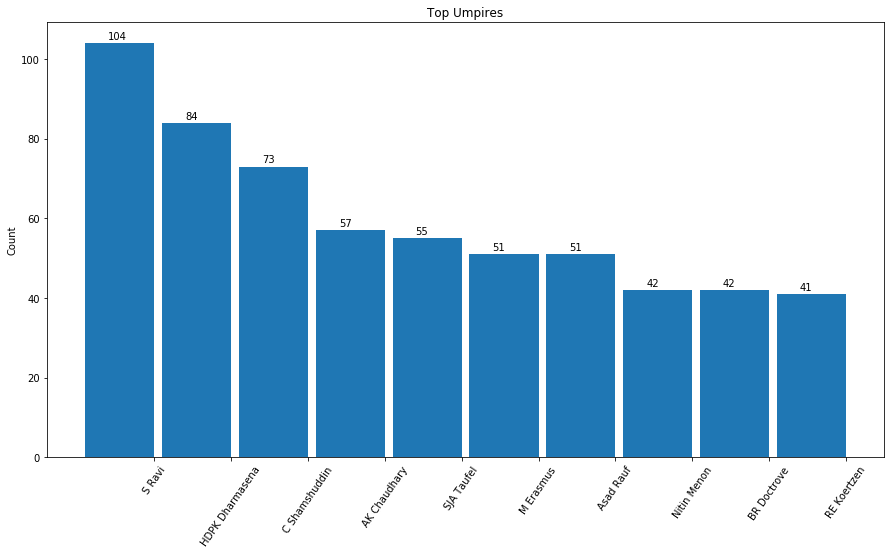

In [14]:
temp_df = pd.melt(df,value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=55)
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

* S Ravi, the upmire seems like tournament specialists as he stood most of the times for making decisions.

In [15]:
champ = df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


* Season champions each year are above

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

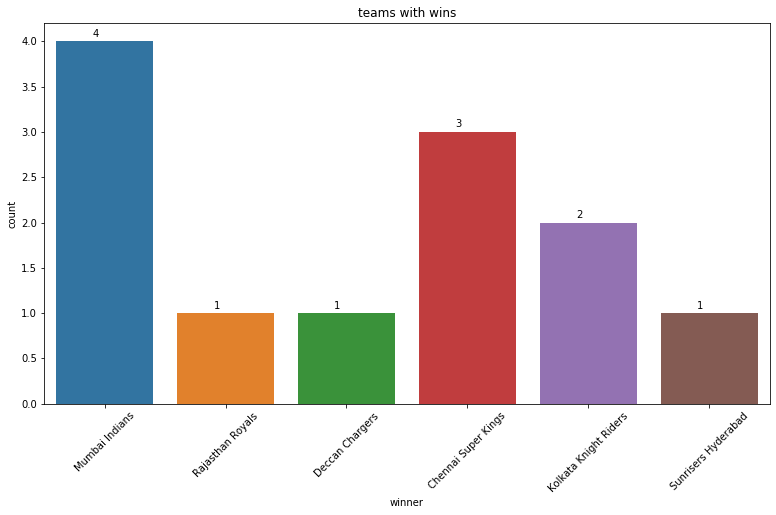

In [16]:
# teams with wins
plt.figure(figsize=(13,7))
ax = sns.countplot(champ['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+0.05),color='black')
plt.show()

* Mumbai Indians, waah team which crowned most of the times as champions.
* Followed up by Chennai SUper Kings.

#### Should i bat or field?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

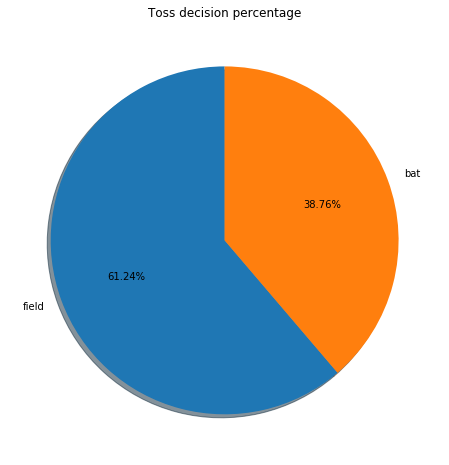

In [17]:
plt.figure(figsize=(10,8))
toss = df.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%0.2f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

* Teams who wins toss more tend to elect field first

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

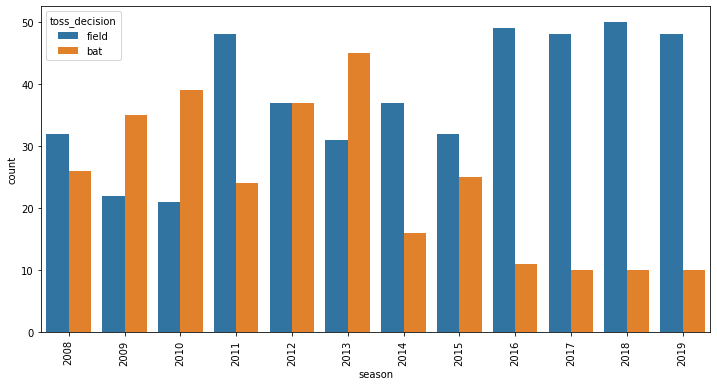

In [18]:
#### seasonal toss analysis
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df)
plt.xticks(rotation='vertical')
plt.show()

* During recent times from 2016 teams love to chase.
* years like 2013, 2012 and 2010 teams wants to set total on board and defend them.

In [19]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

<IPython.core.display.Javascript object>

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Batsmen Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

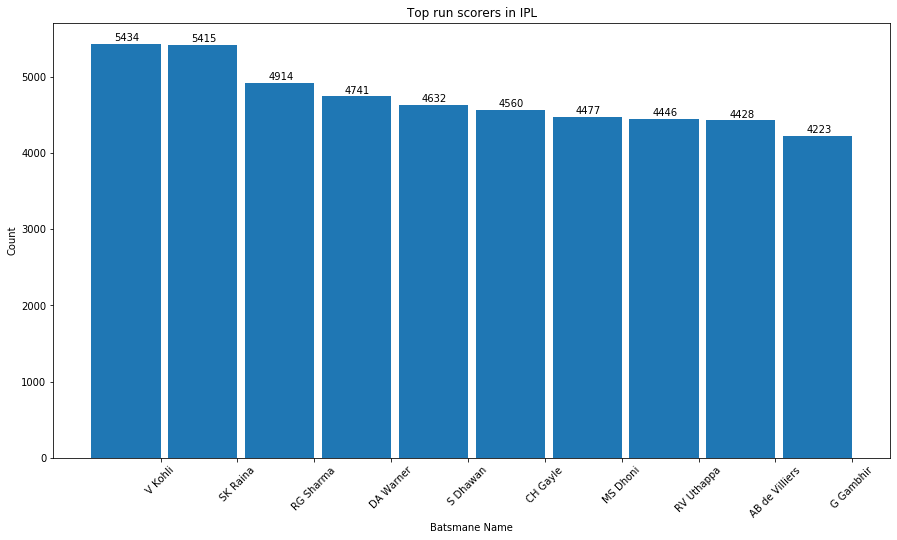

In [29]:
temp_df = df1.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+40),color='black')
plt.show()

* Yes, he is the man Kohli with leading run getter of the tournament followed by Suresh Raina mr.IPL.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

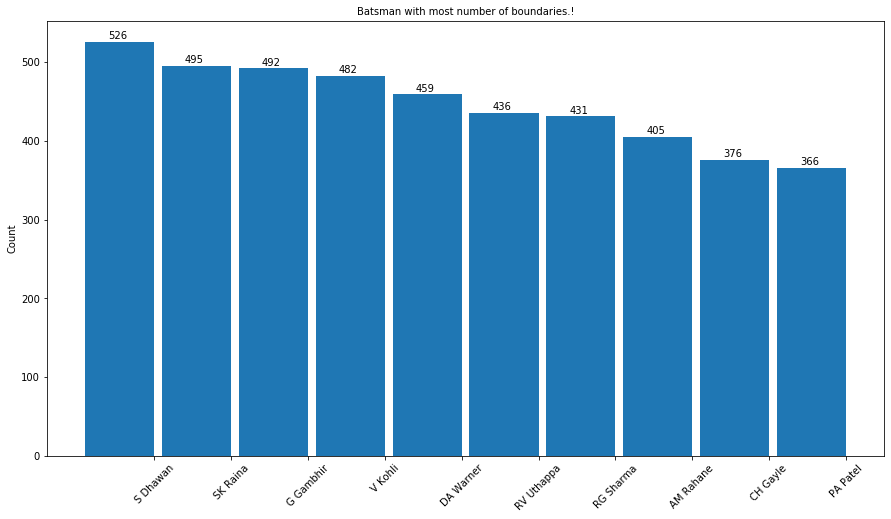

In [32]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

* Shikar Dhawan hits maximum fours followed by Suresh raina

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

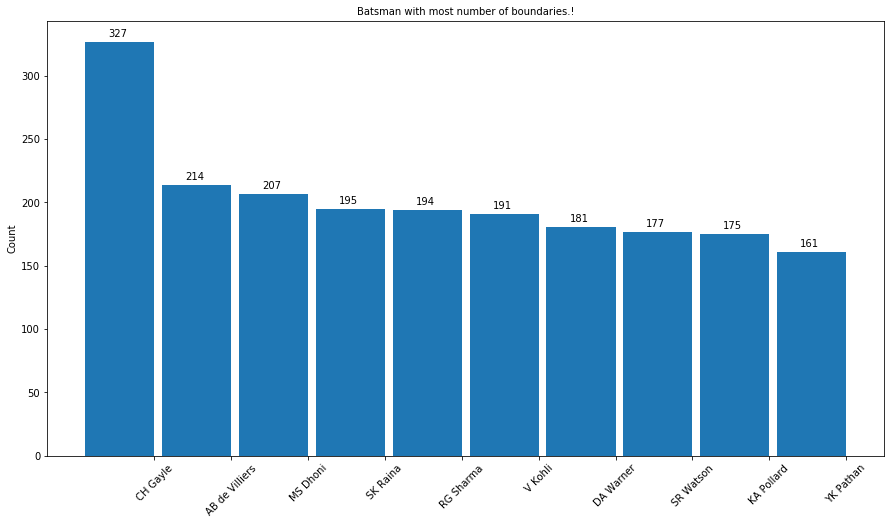

In [33]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

* Its just Gayle storm Universe boss, he tops the list and no one is near to him.
* Good to see Raina in both sixes list fours list and leading run getter list Mr.IPL for a reason.

### Bowler Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

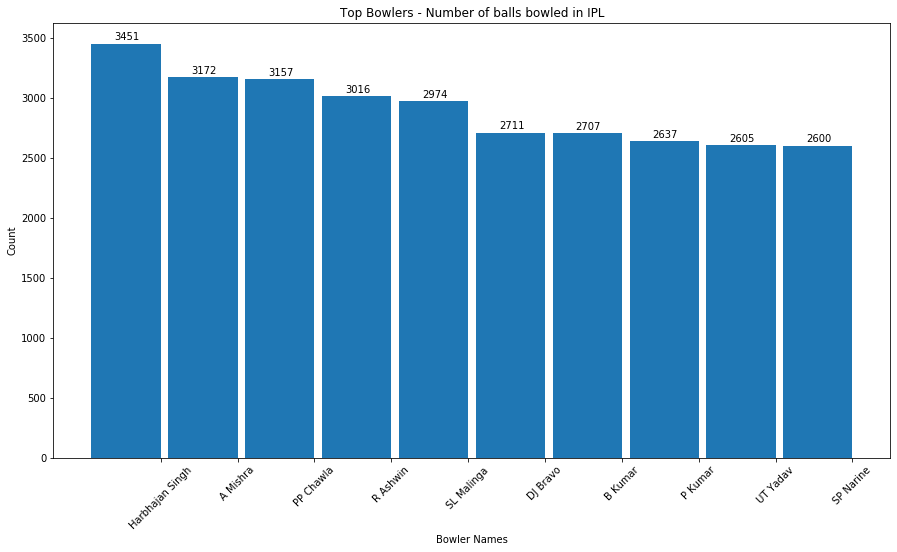

In [38]:
temp_df = df1.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+30),color='black')
plt.show()

* Bajji Harbhajan Singh with golden arm bowled more number of balls in IPL so far.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

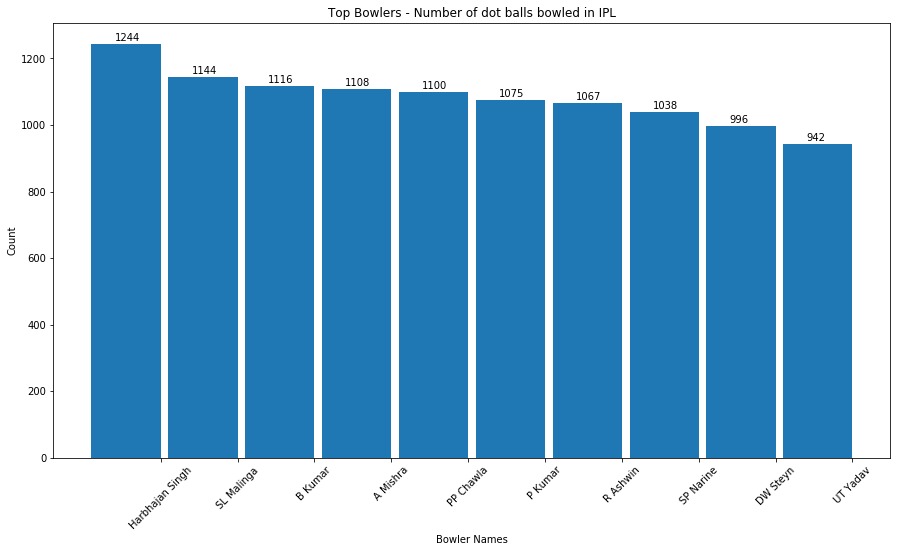

In [43]:
temp_df = df1.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+10),color='black')
plt.show()

* Harbhajan follwed by Malinga bowled more number of dot balls.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

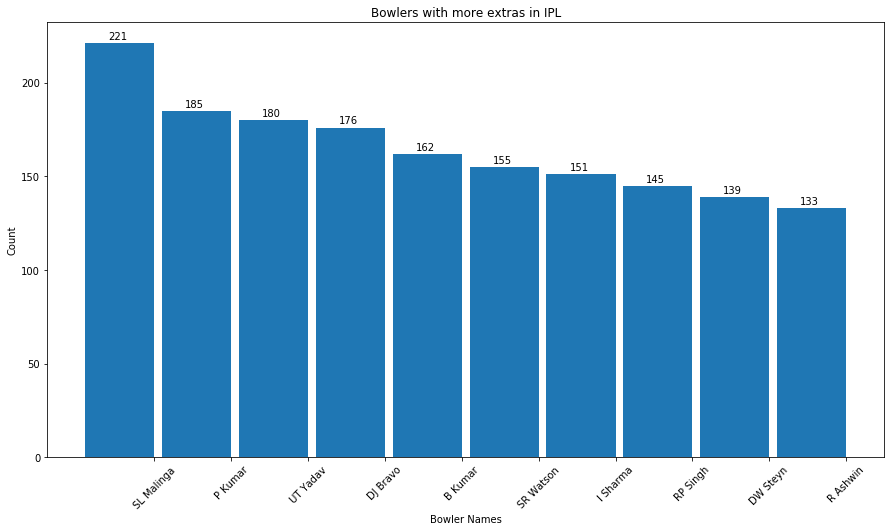

In [47]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = df1.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+2),color='black')
plt.show()

* An unwanted record for Malinga and the bowlers in above graph as they conceeded more number of extra runs